In [13]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [15]:
from google.colab import files
uploaded = files.upload()

Saving train-checkpoint.csv to train-checkpoint.csv


In [17]:
import pandas as pd

train_df = pd.read_csv("train-checkpoint.csv")  # use the actual file name
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [18]:
train_df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [19]:
#deleting unwanted columns
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [20]:
train_df.shape

(20800, 2)

In [21]:
train_df.head(15)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [22]:
train_df.isna().sum()

,0
text,39
label,0


<ipython-input-23-c9e58442f9da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

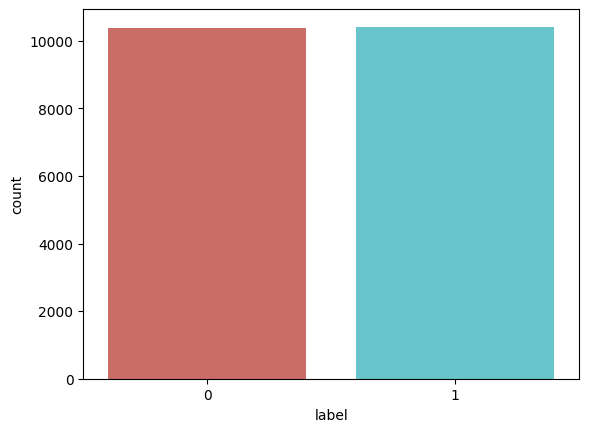

In [23]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_df)

In [24]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


In [25]:
train_df = train_df.dropna()
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [26]:
train_df.shape

(20761, 2)

In [27]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [28]:
train_df.reset_index(drop= True,inplace=True)
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [29]:
label_train = train_df.label
label_train.head(10)

,label
0,1
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,0
9,0


In [30]:
train_df = train_df.drop("label", axis = 1)
train_df.head(10)

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
5,"In these trying times, Jackie Mason is the Voi..."
6,Ever wonder how Britain’s most iconic pop pian...
7,"PARIS — France chose an idealistic, traditi..."
8,Donald J. Trump is scheduled to make a highly ...
9,A week before Michael T. Flynn resigned as nat...


In [31]:
train_df['text'][2188]

'\nThis article was written by John Vibes and originally published at Activist Post.com . \nEditor’s Comment: On the surface, there are good intentions here. The Bushes, like other patriotic establishment figures, always honor the troops, and count the sacrifices. Typically, they are stoic and praiseworthy of everything the military does. But underneath the surface, one has to wonder what is really going on inside the disturbed mind of George W. Bush – whose orders for an illegal war in Iraq, and a broader War on Terror in Afghanistan and elsewhere resulted in the deaths of thousands of U.S. troops, tens of thousands of wounded or injured and potentially more than a million civilians dead. \nDoes he feel remorse? Guilt? Has he admitted to his personal responsibility for what happened to their lives? Or do his paintings reveal a morbid sense of power over the lives of men and women whom he can only reflect upon and humanize after the fact? Considering that the Iraq war was based upon a 

In [35]:
# Download the stopwords corpus if not already present
import nltk
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
# Now you can safely access the stopwords
stpwrds = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [37]:
#splitting the dataset to training and test dataset,80% data to be training data &20% will be testing data.(ie test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.2, random_state=0)

In [38]:
X_train

,text
11948,"ATLANTA — The report, written on notebo..."
5370,"Naming Trump, Nigel Farage in Britain and Mari..."
1179,"Merkel says Facebook, Google ‘distort percepti..."
15032,"GERMANY: “We are Somali Muslims, we don’t have..."
13850,"Hillary Clinton, FBI and the Real November Su..."
...,...
13123,"Share on Facebook I don't know about you, but ..."
19648,A Berkeley student argues that free speech put...
9845,With Justice Neil Gorsuch now seated on the Su...
10799,"Leave a reply \nBill Still – Good morning, I’m..."


In [39]:
X_train.shape

(16608,)

In [40]:
Y_train

,label
11948,0
5370,1
1179,1
15032,1
13850,1
...,...
13123,1
19648,0
9845,0
10799,1


In [41]:
#converting to textual data into numerical data/feature vector

tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train)
tfidf_X_test = tfidf_v.transform(X_test)
print(tfidf_X_train,tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5488836 stored elements and shape (16608, 162248)>
  Coords	Values
  (0, 11308)	0.03194499746251017
  (0, 124048)	0.24226840660308796
  (0, 104744)	0.01733243873851775
  (0, 137333)	0.021800539610408034
  (0, 89411)	0.07308583396376526
  (0, 87461)	0.041475385652959294
  (0, 92093)	0.024047310753346034
  (0, 20656)	0.02189424926915963
  (0, 8042)	0.04687407050902269
  (0, 40524)	0.06823858861989582
  (0, 110341)	0.16825464023382528
  (0, 119555)	0.0732732230313579
  (0, 61613)	0.1030506354954085
  (0, 23827)	0.13717835790012606
  (0, 123488)	0.042583970616721104
  (0, 10366)	0.02387478942916139
  (0, 87555)	0.07669802577863291
  (0, 723)	0.04314139177861858
  (0, 20428)	0.29090063902536906
  (0, 38231)	0.1674788448440838
  (0, 38235)	0.03437494105078922
  (0, 45599)	0.05147127062015234
  (0, 136948)	0.28480017520883194
  (0, 137354)	0.0853918942724191
  (0, 88775)	0.08894158830800365
  :	:
  (16607, 5267)	0.04876054310000157

In [42]:
tfidf_X_train.shape

(16608, 162248)

In [43]:
#model and model training

classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 96.68%


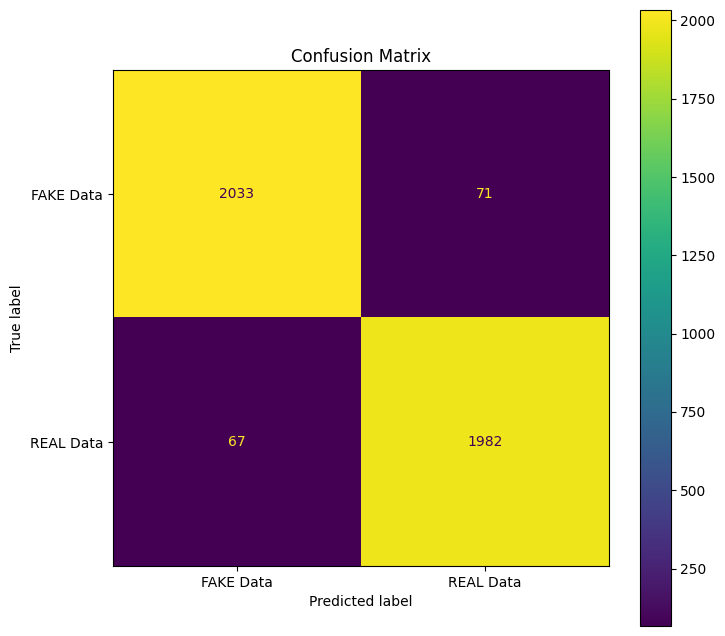

In [45]:
#accuracy score on the test data
Y_pred = classifier.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)

# Import the ConfusionMatrixDisplay class
from sklearn.metrics import ConfusionMatrixDisplay

# Use ConfusionMatrixDisplay to plot the confusion matrix
# The display takes the confusion matrix, display labels, and an optional ax for plotting
# We create a figure and axes to plot on
fig, ax = plt.subplots(figsize=(8, 8)) # Adjust figure size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['FAKE Data', 'REAL Data'])
disp.plot(ax=ax)
plt.title('Confusion Matrix') # Add a title to the plot
plt.show() # Display the plot

In [46]:
print(tfidf_X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1363630 stored elements and shape (4153, 162248)>
  Coords	Values
  (0, 1)	0.0831444751814332
  (0, 228)	0.02463834539275613
  (0, 352)	0.014329039355530265
  (0, 562)	0.01766706303051737
  (0, 1245)	0.013934598748741884
  (0, 1246)	0.018383119938616143
  (0, 1429)	0.01876972620998665
  (0, 1522)	0.07214367539143908
  (0, 1554)	0.01628066310240726
  (0, 1641)	0.01768528645264619
  (0, 2152)	0.0237526079631043
  (0, 2174)	0.023200731758731316
  (0, 2949)	0.025671200921293137
  (0, 3147)	0.020490747780796674
  (0, 3148)	0.022926386497429705
  (0, 3753)	0.06497017490017656
  (0, 4070)	0.04835114209320081
  (0, 4636)	0.02016136005668658
  (0, 4753)	0.013189702821305105
  (0, 4762)	0.014464469223947833
  (0, 4852)	0.013771859360974791
  (0, 4988)	0.01217810785769256
  (0, 5430)	0.021132176693903926
  (0, 5549)	0.019042403046772346
  (0, 6011)	0.017501784562587875
  :	:
  (4152, 135475)	0.015369040235614216
  (4152, 135662)	0.0216

In [47]:
print(Y_test)

9383     0
1471     0
4480     0
17543    1
775      0
        ..
11562    0
18758    0
19925    1
16765    0
16236    0
Name: label, Length: 4153, dtype: int64


In [49]:
X_new=tfidf_X_test[3]
prediction = classifier.predict(X_new) # Changed loaded_model to classifier

if (prediction[0] == 1):
	print("Prediction of the News :  Looking Fake⚠ News📰 ")
else:
	print("Prediction of the News : Looking Real News📰 ")

Prediction of the News :  Looking Fake⚠ News📰 


In [50]:
print(Y_test[17543])

1


In [51]:
def fake_news_det(news):
    review = news
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    corpus = []
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    input_data = [' '.join(corpus)]
    vectorized_input_data = tfidf_v.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    if prediction[0] == 1:
        print("Prediction of the News :  Looking Fake⚠ News📰 ")
    else:
        print("Prediction of the News : Looking Real News📰 ")

In [52]:
X_test

,text
9383,JERUSALEM — “Mr. President!” a woman called...
1471,MILO’s upcoming book DANGEROUS has jumped to t...
4480,NEW DELHI — India’s rapidly worsening air p...
17543,There is nothing presidential (in a dignified ...
775,"On Thursday, Republican Senators Ted Cruz ( ) ..."
...,...
11562,CAIRO — One of Egypt’s highest courts overt...
18758,A bill in Congress could make it harder for wo...
19925,Email \nRebutting the Justice Department’s ass...
16765,You used to need $10 million to become a custo...


In [53]:
X_test[16236]

'WASHINGTON, Conn.  —   In 1999, a television writer named Amy   vacationed at the Mayflower Grace, a   inn built high on a hill here. In true Hollywood fashion, Ms.   returned to her hometown, Los Angeles, and from her brief visit spun Stars Hollow  —   a charming New England small town with its own resident troubadour. Stars Hollow would become the setting for “Gilmore Girls,” her cultishly popular   dramedy that ran for seven seasons on the WB (and later the CW). Last weekend, more than 1, 300 fans, most of them women, many of them mothers and daughters, descended on this rural town in western Connecticut (population: 3, 500) for the first Gilmore Girls Fan Fest. They had come from Oklahoma and Minnesota and as far away as Brazil  —   and paid as much as $250 per ticket  —   to see the “real” Stars Hollow and meet some of the actors who play its residents. In a way, they wanted to do the impossible: to experience in waking life a dream town built on a studio backlot. In Stars Hollow

In [54]:
Y_test[16236]

np.int64(0)

In [ ]:
news=str(input("Enter the News:"))
fake_news_det(news)